In [1]:
#„ÉÜ„É≥„Éó„É¨„Éº„Éà

# „É¢„Ç∏„É•„Éº„É´„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np  # Êï∞ÂÄ§Ë®àÁÆó„ÇÑÈÖçÂàóÊìç‰Ωú„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
import pandas as pd  # Ë°®ÂΩ¢Âºè„ÅÆ„Éá„Éº„Çø„ÇíÊâ±„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
import matplotlib.pyplot as plt  # „Éá„Éº„ÇøÂèØË¶ñÂåñ„ÅÆ„Åü„ÇÅ„ÅÆÂü∫Êú¨ÁöÑ„Å™„Ç∞„É©„ÉïÊèèÁîª„É©„Ç§„Éñ„É©„É™
import seaborn as sns  # È´òÊ©üËÉΩ„Å™Áµ±Ë®à„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã„É©„Ç§„Éñ„É©„É™
import lightgbm as lgb
import os
import datetime
from sklearn.preprocessing import LabelEncoder  # „Ç´„ÉÜ„Ç¥„É™Â§âÊï∞„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ„Åô„Çã„Ç®„É≥„Ç≥„Éº„ÉÄ
from sklearn.metrics import roc_auc_score  # ROC AUC„Çπ„Ç≥„Ç¢„ÇíË®àÁÆó„Åô„ÇãË©ï‰æ°ÊåáÊ®ô
from sklearn.model_selection import KFold  # ÈÄöÂ∏∏„ÅÆKÂàÜÂâ≤‰∫§Â∑ÆÊ§úË®ºÔºà‰ªäÂõû‰ΩøÁî®Ôºâ
from lightgbm import LGBMClassifier  # LightGBM„ÅÆ„É¢„Éá„É´„ÇØ„É©„Çπ



# Ë™≠„ÅøËæº„ÇÄ„Éá„Éº„Çø„ÅåÊ†ºÁ¥ç„Åï„Çå„Åü„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ„Éë„ÇπÔºà‚ÄªÂøÖË¶Å„Å´Âøú„Åò„Å¶Â§âÊõ¥„ÅÆÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„ÅôÔºâ
PATH = '../data/'


X = pd.read_csv(PATH + 'train.csv')  # Â≠¶ÁøíÁî®„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
test = pd.read_csv(PATH + 'test.csv')    # „ÉÜ„Çπ„ÉàÁî®„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

In [2]:
# Age„ÅÆÊ¨†ÊêçË£úÂÆå„Å®Ê¨†Êêç„Éï„É©„Ç∞„ÅÆËøΩÂä†Ôºàtrain„Å®test„ÅÆ‰∏°Êñπ„Å´ÈÅ©Áî®Ôºâ

# X„Éá„Éº„Çø
X["Age_filled"] = X["Age"].fillna(-1)
X["Age_missing"] = X["Age"].isna().astype(int)
X = X.drop(columns=["Age"])

# test„Éá„Éº„Çø
test["Age_filled"] = test["Age"].fillna(-1)
test["Age_missing"] = test["Age"].isna().astype(int)
test = test.drop(columns=["Age"])

# Êï∞ÂÄ§È†ÖÁõÆ„ÅÆ„ÅÜ„Å°Ê¨†Êêç„Åå„ÅÇ„Çã„ÇÇ„ÅÆ„Çí‰∏≠Â§ÆÂÄ§„ÅßË£úÂÆåÔºàX/testÂÖ±ÈÄöÂá¶ÁêÜÔºâ

# Ê¨†Êêç„Åå„ÅÇ„ÇãÂàó„ÇíËá™ÂãïÊ§úÂá∫„Åó„Å¶Âá¶ÁêÜ
for col in X.columns:
    if X[col].isna().sum() > 0:
        median = X[col].median()
        X[col] = X[col].fillna(median)
        test[col] = test[col].fillna(median)

### „É¢„Éá„É´Â≠¶ÁøíÂâç„ÅÆ„Éá„Éº„ÇøÂä†Â∑•

LightGBM „Å´„Çà„ÇãÂ≠¶Áøí„ÇíË°å„ÅÜÂâç„Å´„ÄÅ„Éá„Éº„ÇøÂΩ¢Âºè„ÇíÊï¥„Åà„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„ÄÇÁâπ„Å´„ÄÅLightGBM „ÅØ `int`, `float`, `bool` Âûã„ÅÆÊï∞ÂÄ§„Éá„Éº„Çø„ÇíÂâçÊèê„Å®„Åô„Çã„Åü„ÇÅ„ÄÅ`object` ÂûãÔºàÊñáÂ≠óÂàóÔºâ„ÅÆ„Ç´„ÉÜ„Ç¥„É™Â§âÊï∞„ÅØÊï∞ÂÄ§Âåñ„ÅåÂøÖË¶Å„Åß„ÅÇ„Çã„ÄÇ

In [3]:
X = X.drop(columns=["Id"])
test = test.drop(columns=["Id"])

In [4]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["School", "Player_Type", "Position_Type", "Position"]

for col in cat_cols:
    le = LabelEncoder()
    all_values = pd.concat([X[col], test[col]]).astype(str)
    le.fit(all_values)
    
    X[col] = le.transform(X[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

In [5]:
y = X["Drafted"]
X = X.drop(columns=["Drafted"])

In [6]:
X["BMI"] = X["Weight"] / (X["Height"] / 100) ** 2
test["BMI"] = test["Weight"] / (test["Height"] / 100) ** 2

In [7]:
X = X.drop(columns=["School"])
test = test.drop(columns=["School"])

#‰∫àÊ∏¨„É¢„Éá„É´„Å®„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    model = LGBMClassifier(
    max_depth=3,
    num_leaves=7,
    min_child_samples=30,
    min_split_gain=0.0,         # ËøΩÂä†1
    subsample=0.8,              # ËøΩÂä†2
    colsample_bytree=0.8,       # ËøΩÂä†3
    reg_alpha=2.0,              # Âº∑Âåñ1
    reg_lambda=2.0,             # Âº∑Âåñ2
    learning_rate=0.05,
    n_estimators=500,
    random_state=42
)


    model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(0)  # „É≠„Ç∞ÈùûË°®Á§∫
    ]
)



    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    
    print(f"Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

print(f"\nAverage Train AUC: {np.mean(train_aucs):.4f}")
print(f"Average Validation AUC: {np.mean(val_aucs):.4f}")

[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

### ‰∏ÄÈÉ®Â§âÊõ¥
max_depth=4,
num_leaves=15,
„Å∏Â§âÊõ¥

[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

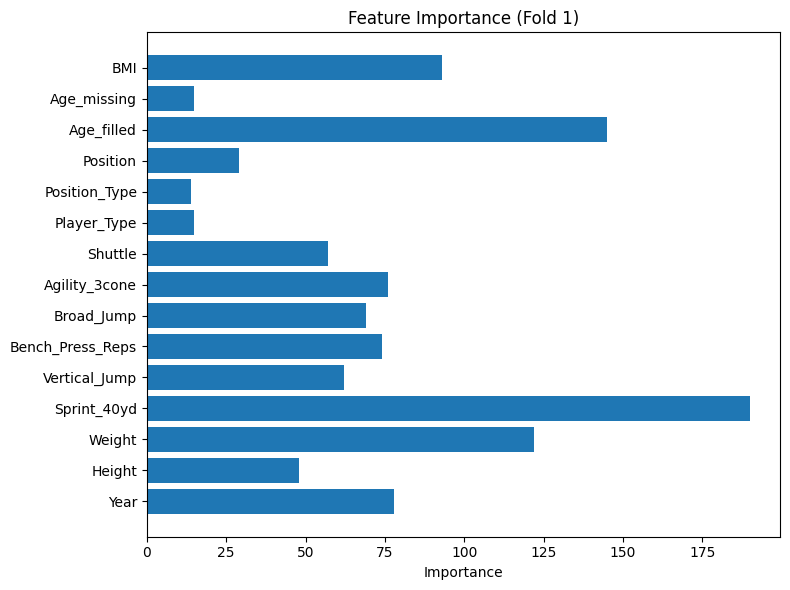

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    model = LGBMClassifier(
    max_depth=4,
    num_leaves=15,
    min_child_samples=30,
    min_split_gain=0.0,         # ËøΩÂä†1
    subsample=0.8,              # ËøΩÂä†2
    colsample_bytree=0.8,       # ËøΩÂä†3
    reg_alpha=2.0,              # Âº∑Âåñ1
    reg_lambda=2.0,             # Âº∑Âåñ2
    learning_rate=0.05,
    n_estimators=500,
    random_state=42
)


    model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(0)  # „É≠„Ç∞ÈùûË°®Á§∫
    ]
)



    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    
    print(f"Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    # ‚òÖ Fold 1 „ÅÆ„ÅÇ„Å®„Å´‰∏ÄÂ∫¶„Å†„ÅëÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ
    if fold == 0:
        import matplotlib.pyplot as plt
        importances = model.feature_importances_
        feature_names = X.columns
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importances)
        plt.title("Feature Importance (Fold 1)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\nAverage Train AUC: {np.mean(train_aucs):.4f}")
print(f"Average Validation AUC: {np.mean(val_aucs):.4f}")

In [10]:
original_X = X.copy()  # ‚Üê ÂâäÈô§Ââç„ÅÆÁä∂ÊÖã„Çí‰øùÊåÅ
original_test = test.copy()

"Player_Type", "Position_Type", "Age_missing", "Position"„ÇíÂâäÈô§„Åó„Å¶„Åø„Çã

In [11]:
columns_to_drop = ["Player_Type", "Position_Type", "Age_missing", "Position"]
X = X.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

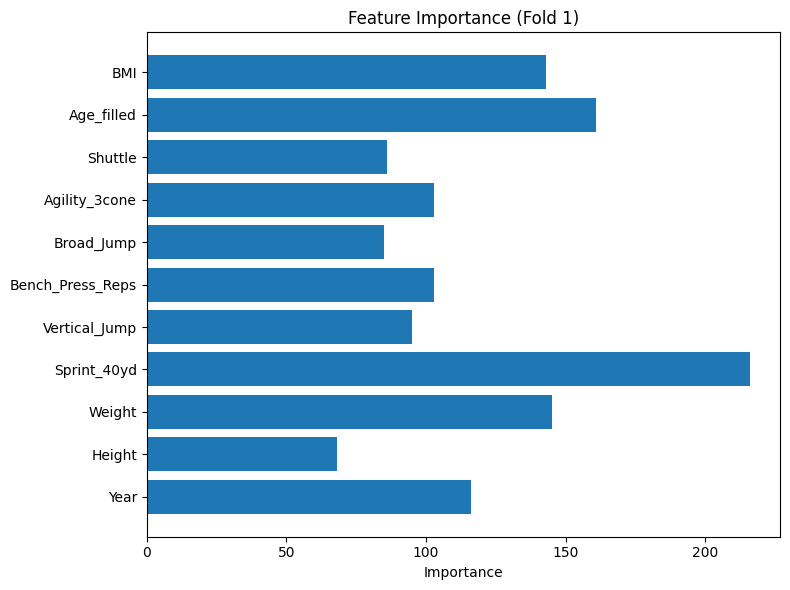

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    model = LGBMClassifier(
    max_depth=4,
    num_leaves=15,
    min_child_samples=30,
    min_split_gain=0.0,         # ËøΩÂä†1
    subsample=0.8,              # ËøΩÂä†2
    colsample_bytree=0.8,       # ËøΩÂä†3
    reg_alpha=2.0,              # Âº∑Âåñ1
    reg_lambda=2.0,             # Âº∑Âåñ2
    learning_rate=0.05,
    n_estimators=500,
    random_state=42
)


    model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(0)  # „É≠„Ç∞ÈùûË°®Á§∫
    ]
)



    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    
    print(f"Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    # ‚òÖ Fold 1 „ÅÆ„ÅÇ„Å®„Å´‰∏ÄÂ∫¶„Å†„ÅëÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ
    if fold == 0:
        import matplotlib.pyplot as plt
        importances = model.feature_importances_
        feature_names = X.columns
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importances)
        plt.title("Feature Importance (Fold 1)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\nAverage Train AUC: {np.mean(train_aucs):.4f}")
print(f"Average Validation AUC: {np.mean(val_aucs):.4f}")

"Age_missing", "Position"„Å†„ÅëÊàª„Åó„Å¶„Åø„Çã

In [13]:
# ÂâçÂõûÂâäÈô§„Åó„Åü‰∏≠„Åã„Çâ„Äå‰∏ÄÈÉ®„Å†„ÅëÊàª„Åô„Äç
columns_to_restore = ["Age_missing", "Position"]
X = pd.concat([X, original_X[columns_to_restore]], axis=1)
test = pd.concat([test, original_test[columns_to_restore]], axis=1)

[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

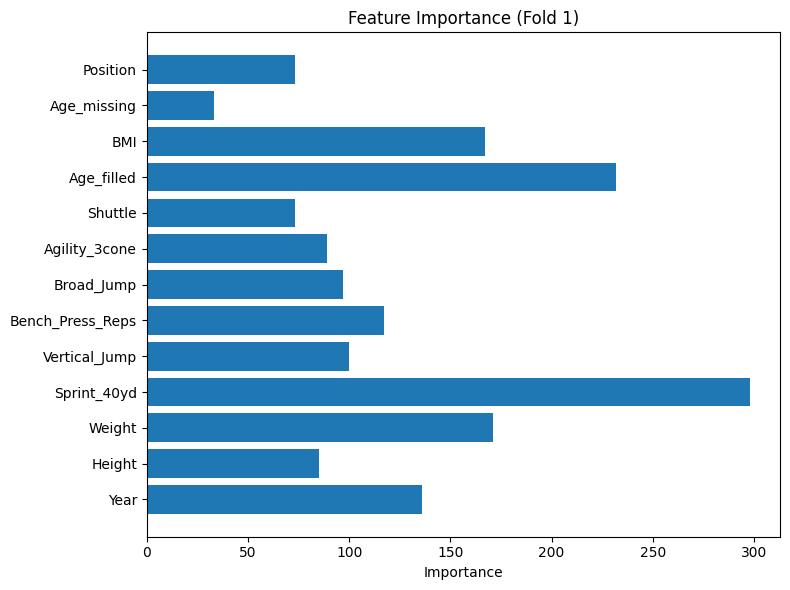

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    model = LGBMClassifier(
    max_depth=4,
    num_leaves=15,
    min_child_samples=30,
    min_split_gain=0.0,         # ËøΩÂä†1
    subsample=0.8,              # ËøΩÂä†2
    colsample_bytree=0.8,       # ËøΩÂä†3
    reg_alpha=3.0,              # Âº∑Âåñ1
    reg_lambda=2.0,             # Âº∑Âåñ2
    learning_rate=0.03,
    n_estimators=700,
    random_state=42
)


    model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(0)  # „É≠„Ç∞ÈùûË°®Á§∫
    ]
)



    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    
    print(f"Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    # ‚òÖ Fold 1 „ÅÆ„ÅÇ„Å®„Å´‰∏ÄÂ∫¶„Å†„ÅëÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ
    if fold == 0:
        import matplotlib.pyplot as plt
        importances = model.feature_importances_
        feature_names = X.columns
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importances)
        plt.title("Feature Importance (Fold 1)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\nAverage Train AUC: {np.mean(train_aucs):.4f}")
print(f"Average Validation AUC: {np.mean(val_aucs):.4f}")

In [15]:
# üîÑ ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàêÂá¶ÁêÜÔºàLightGBM„É¢„Éá„É´„Å´Âü∫„Å•„Åè‰∫àÊ∏¨Ôºâ

# original_test „ÇíÂÜçË™≠„ÅøËæº„Åø„Åó„Å¶ Id „ÇíÂæ©ÂÖÉ
original_test = pd.read_csv(PATH + "test.csv")

# ÁâπÂæ¥Èáè„É™„Çπ„ÉàÔºàX „Å´ÁèæÂú®ÊÆã„Å£„Å¶„ÅÑ„ÇãÂàó„Åå„Åù„ÅÆ„Åæ„ÅæÊúÄÁµÇÁâπÂæ¥ÈáèÔºâ
feature_cols = X.columns

# test „Éá„Éº„Çø„ÇÇÂêå„ÅòÂàóÈ†Ü„ÅßÊï¥ÂΩ¢Ôºà‰∫àÊ∏¨ÂØæË±°Ôºâ
X_test = test[feature_cols]

# LightGBM„É¢„Éá„É´„Åß‰∫àÊ∏¨ÔºàDrafted=1 „ÅÆÁ¢∫ÁéáÔºâ
y_pred = model.predict_proba(X_test)[:, 1]

# ÊèêÂá∫Áî®DataFrame„Çí‰ΩúÊàê
submission = pd.DataFrame({
    "Id": original_test["Id"],
    "Drafted": y_pred
})

# ‰øùÂ≠ò„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí„Éó„É≠„Ç∏„Çß„ÇØ„Éà„É´„Éº„Éà„Å´‰ΩúÊàê
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
save_dir = os.path.join(root_dir, "submissions")
os.makedirs(save_dir, exist_ok=True)

# „Éï„Ç°„Ç§„É´Âêç„Çí YYYYMMDD_HHMM ÂΩ¢Âºè„ÅßÊßãÊàê
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
filename = f"submission_{timestamp}.csv"
save_path = os.path.join(save_dir, filename)

submission.to_csv(save_path, index=False)
print(f"‚úÖ ÊèêÂá∫„Éï„Ç°„Ç§„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: {save_path}")


‚úÖ ÊèêÂá∫„Éï„Ç°„Ç§„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: c:\Users\81807\Desktop\Kaggle\GCI‚ë°(NFL Draft Prediction)\submissions\submission_20250627_0003.csv
